# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd

# Carregar o arquivo demo01.csv
file_path = '/content/demo01.csv'
dados = pd.read_csv(file_path)

# Visualizar as primeiras linhas do DataFrame
print(dados.head())

# Obter informações sobre as variáveis e tipos de dados
print(dados.info())

# Verificar a quantidade de missings em cada variável
print("Quantidade de missings por variável:\n", dados.isnull().sum())

# Avaliar a distribuição da variável resposta (assumindo 'mau' como binária)
print("Distribuição da variável resposta ('mau'):\n", dados['mau'].value_counts())

  sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    F                N               Y           0  Commercial associate   
3    M                Y               Y           0               Working   
4    F                Y               N           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education               Married  House / apartment   
4              Incomplete higher               Married  House / apartment   

       idade  tempo_emprego  possui_celular  possui_fone_comercial  \
0  5

In [2]:
# Criar um dataframe de metadados
metadata = pd.DataFrame({'Variável': dados.columns, 'Tipo de Dados': dados.dtypes})

# Adicionar a coluna 'qtd_categorias'
qtd_categorias = []

for coluna in dados.columns:
    qtd_categorias.append(dados[coluna].nunique())

metadata['qtd_categorias'] = qtd_categorias

# Visualizar o dataframe de metadados
print("\nMetadados:\n", metadata)


Metadados:
                                     Variável Tipo de Dados  qtd_categorias
sexo                                    sexo        object               2
posse_de_veiculo            posse_de_veiculo        object               2
posse_de_imovel              posse_de_imovel        object               2
qtd_filhos                        qtd_filhos         int64               8
tipo_renda                        tipo_renda        object               5
educacao                            educacao        object               5
estado_civil                    estado_civil        object               5
tipo_residencia              tipo_residencia        object               6
idade                                  idade       float64            5298
tempo_emprego                  tempo_emprego       float64            3005
possui_celular                possui_celular         int64               1
possui_fone_comercial  possui_fone_comercial         int64               2
possui_fone 

In [3]:
# Carregar o arquivo demo01.csv
file_path = '/content/demo01.csv'
dados = pd.read_csv(file_path)

# Criar variáveis dummy para as variáveis qualitativas
variaveis_qualitativas = dados.select_dtypes(include=['object']).columns
dados = pd.get_dummies(dados, columns=variaveis_qualitativas, drop_first=True)

# Criar um dataframe apenas com as variáveis apropriadas para entrada no scikit-learn
X = dados.drop(columns=['mau'])  # Exclua a variável resposta
y = dados['mau']  # Variável resposta

# Visualizar as primeiras linhas do DataFrame resultante
print("\nDataFrame com variáveis apropriadas para o scikit-learn:\n", X.head())
print("\nVariável resposta:\n", y.head())


DataFrame com variáveis apropriadas para o scikit-learn:
    qtd_filhos      idade  tempo_emprego  possui_celular  \
0           0  58.832877       3.106849               1   
1           0  52.356164       8.358904               1   
2           0  52.356164       8.358904               1   
3           0  46.224658       2.106849               1   
4           0  29.230137       3.021918               1   

   possui_fone_comercial  possui_fone  possui_email  qt_pessoas_residencia  \
0                      0            0             0                    2.0   
1                      0            1             1                    1.0   
2                      0            1             1                    1.0   
3                      1            1             1                    2.0   
4                      0            0             0                    2.0   

   sexo_M  posse_de_veiculo_Y  ...  educacao_Secondary / secondary special  \
0       1                   1  ...     

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

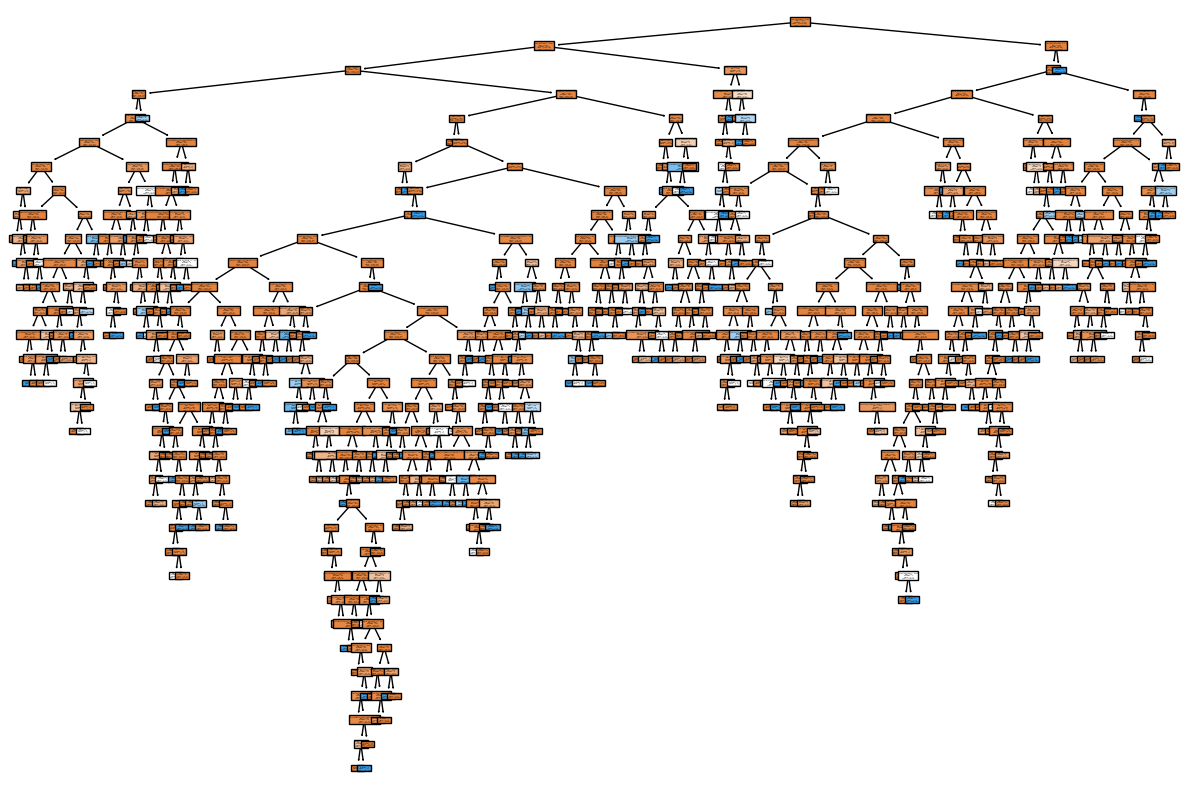

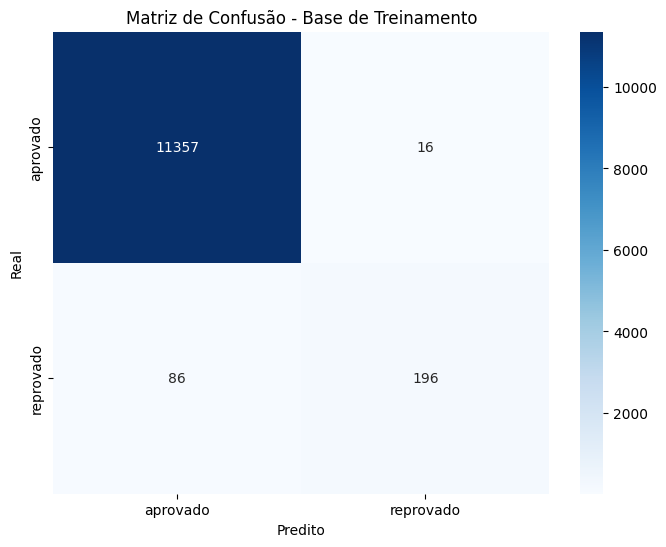

Acurácia na base de treinamento: 0.9912


In [4]:
# Importar bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Separar 70% da base para treinamento e 30% para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Definir um objeto com a função da árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

# 3. Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)

# 4. Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=['aprovado', 'reprovado'])
plt.show()

# 5. Produzir uma visualização da matriz de confusão
y_pred_train = modelo_arvore.predict(X_train)
matriz_confusao = confusion_matrix(y_train, y_pred_train)

# Criar visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovado', 'reprovado'],
            yticklabels=['aprovado', 'reprovado'])
plt.title('Matriz de Confusão - Base de Treinamento')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# 6. Calcular a acurácia na base de treinamento
acuracia_treino = accuracy_score(y_train, y_pred_train)
print(f'Acurácia na base de treinamento: {acuracia_treino:.4f}')


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

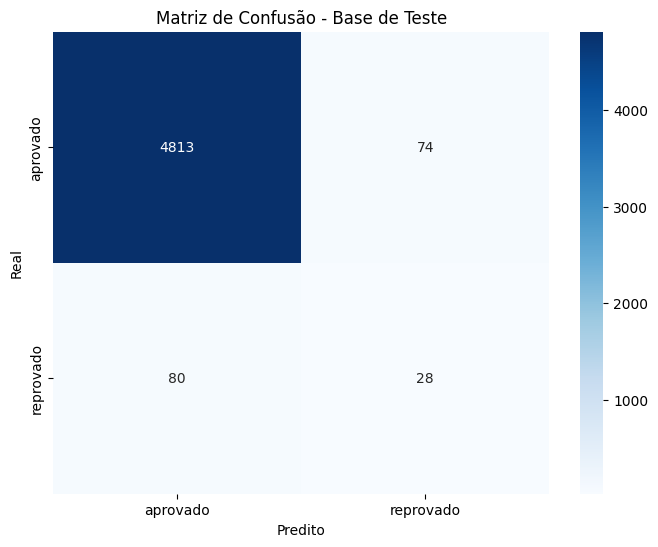

Acurácia na base de teste: 0.9692


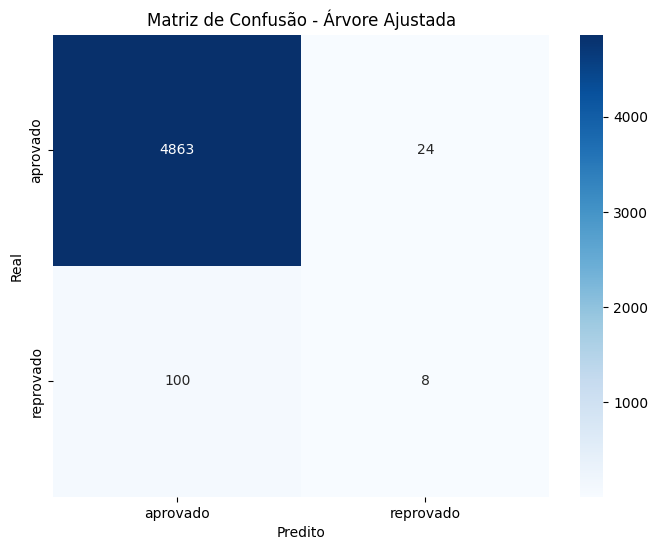

Proporção de proponentes classificados como "maus": 0.0064
Acurácia se todos os contratos fossem classificados como "bons": 0.9784


In [5]:
# 1. Classificar a base de teste de acordo com a árvore treinada
y_pred_test = modelo_arvore.predict(X_val)

# 2. Produzir a visualização da matriz de confusão para a base de teste
matriz_confusao_teste = confusion_matrix(y_val, y_pred_test)

# Criar visualização da matriz de confusão para a base de teste
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_teste, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovado', 'reprovado'],
            yticklabels=['aprovado', 'reprovado'])
plt.title('Matriz de Confusão - Base de Teste')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# 3. Calcular a acurácia na base de teste
acuracia_teste = accuracy_score(y_val, y_pred_test)
print(f'Acurácia na base de teste: {acuracia_teste:.4f}')

# 4. Treinar uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10
modelo_arvore_ajustada = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_arvore_ajustada.fit(X_train, y_train)

# Avaliar a matriz de confusão da nova árvore
y_pred_ajustada = modelo_arvore_ajustada.predict(X_val)
matriz_confusao_ajustada = confusion_matrix(y_val, y_pred_ajustada)

# Criar visualização da matriz de confusão para a árvore ajustada
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_ajustada, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovado', 'reprovado'],
            yticklabels=['aprovado', 'reprovado'])
plt.title('Matriz de Confusão - Árvore Ajustada')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Observar a distribuição da predição
proporcao_maus = np.mean(y_pred_ajustada == 1)
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.4f}')

# Calcular a acurácia se todos os contratos fossem classificados como "bons"
acuracia_todos_bons = accuracy_score(y_val, np.zeros_like(y_val))
print(f'Acurácia se todos os contratos fossem classificados como "bons": {acuracia_todos_bons:.4f}')


# CreditGuard: Desbravando as Fronteiras da Avaliação de Crédito#

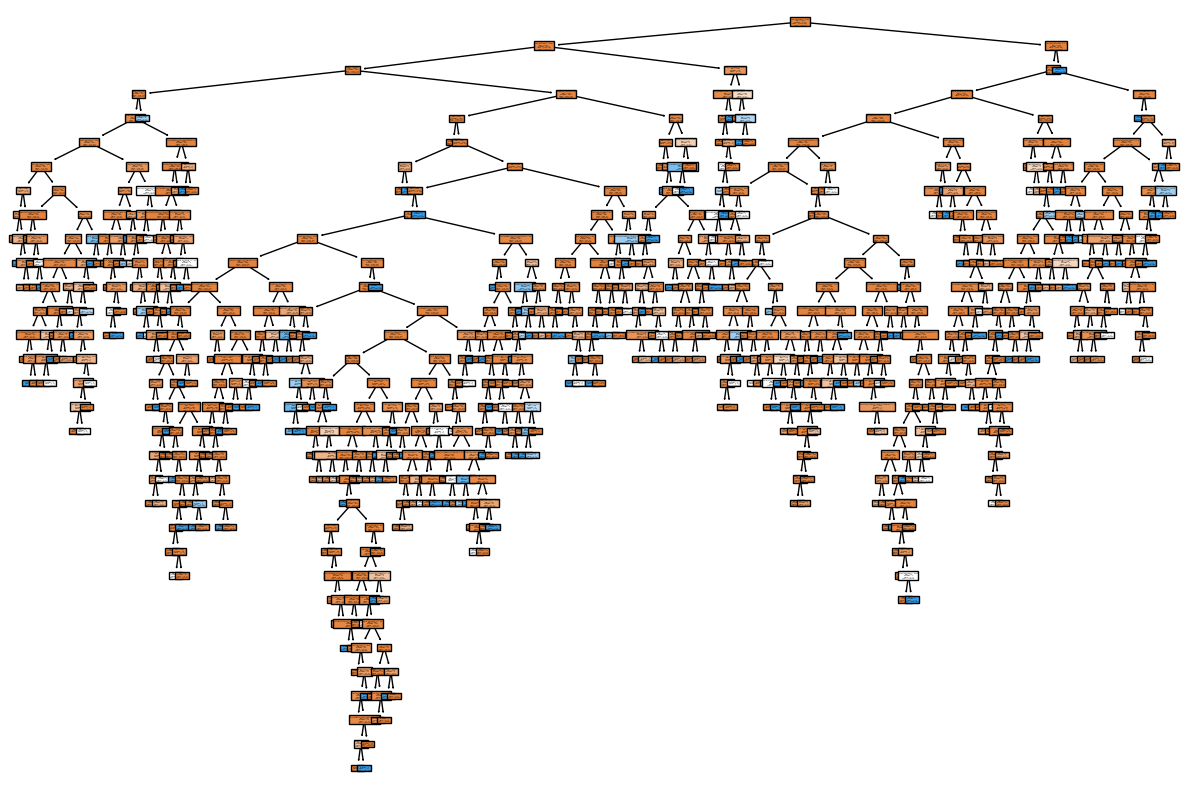

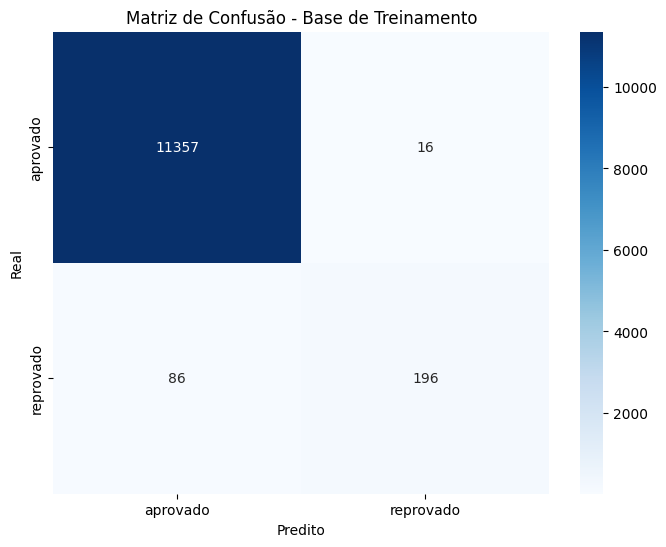

Acurácia na base de treinamento: 0.9912


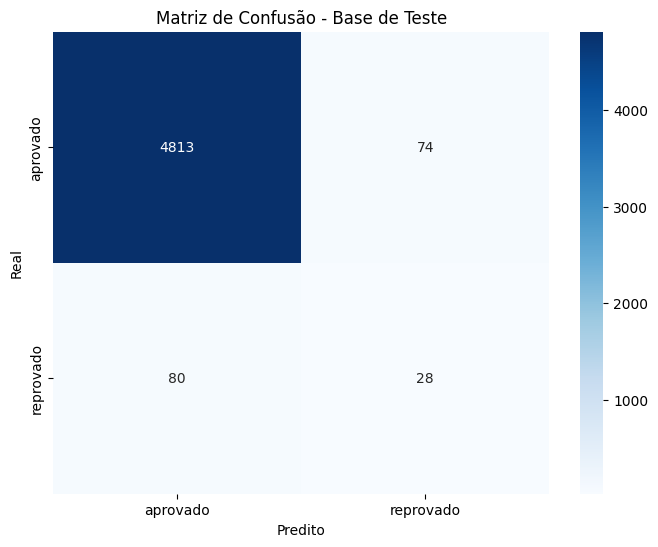

Acurácia na base de teste: 0.9692


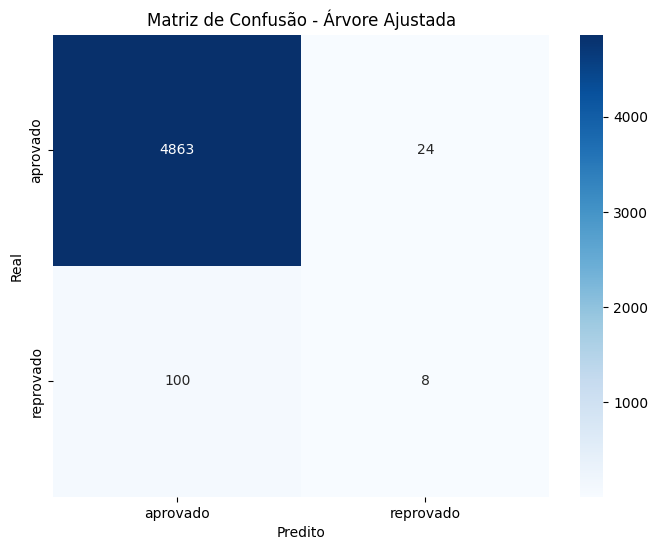

Proporção de proponentes classificados como "maus": 0.0064
Acurácia se todos os contratos fossem classificados como "bons": 0.9784


In [6]:
# Importar bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Separar 70% da base para treinamento e 30% para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Definir um objeto com a função da árvore de decisão e treinar o modelo com os dados de treinamento
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train, y_train)

# 3. Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=['aprovado', 'reprovado'])
plt.show()

# 4. Produzir uma visualização da matriz de confusão para a base de treinamento
y_pred_train = modelo_arvore.predict(X_train)
matriz_confusao_train = confusion_matrix(y_train, y_pred_train)

# Criar visualização da matriz de confusão para a base de treinamento
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_train, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovado', 'reprovado'],
            yticklabels=['aprovado', 'reprovado'])
plt.title('Matriz de Confusão - Base de Treinamento')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Calcular a acurácia na base de treinamento
acuracia_treino = accuracy_score(y_train, y_pred_train)
print(f'Acurácia na base de treinamento: {acuracia_treino:.4f}')

# 5. Classificar a base de teste de acordo com a árvore treinada
y_pred_test = modelo_arvore.predict(X_val)

# 6. Produzir uma visualização da matriz de confusão para a base de teste
matriz_confusao_teste = confusion_matrix(y_val, y_pred_test)

# Criar visualização da matriz de confusão para a base de teste
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_teste, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovado', 'reprovado'],
            yticklabels=['aprovado', 'reprovado'])
plt.title('Matriz de Confusão - Base de Teste')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Calcular a acurácia na base de teste
acuracia_teste = accuracy_score(y_val, y_pred_test)
print(f'Acurácia na base de teste: {acuracia_teste:.4f}')

# 7. Treinar uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10
modelo_arvore_ajustada = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_arvore_ajustada.fit(X_train, y_train)

# 8. Avaliar a matriz de confusão da nova árvore
y_pred_ajustada = modelo_arvore_ajustada.predict(X_val)
matriz_confusao_ajustada = confusion_matrix(y_val, y_pred_ajustada)

# Criar visualização da matriz de confusão para a árvore ajustada
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_ajustada, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovado', 'reprovado'],
            yticklabels=['aprovado', 'reprovado'])
plt.title('Matriz de Confusão - Árvore Ajustada')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# 9. Observar a distribuição da predição
proporcao_maus = np.mean(y_pred_ajustada == 1)
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.4f}')

# 10. Calcular a acurácia se todos os contratos fossem classificados como "bons"
acuracia_todos_bons = accuracy_score(y_val, np.zeros_like(y_val))
print(f'Acurácia se todos os contratos fossem classificados como "bons": {acuracia_todos_bons:.4f}')
